# CAC Experiment

![MohammadInstructionImage](MohammadInstructionImage.png)

S =     [ME, GE, SC, HOLO, VR, VID, REAL] <br>
87.66 = [1 ,  1,  1,     1, 0,   0,    0] <br>
76.55 = [0 ,  1,  1,     0, 1,   0,    0] <br>
45.83 = [1 ,  1,  0,     0, 0,   1,    0] <br>
76.55 = [1 ,  1,  1,     0, 0,   0,    1] <br>

ABOVE IS NO LONGER VALID

S = [ME, GE, SC, HP]

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [36]:
a = np.array([
    [1,1,1,0],
    [0,1,1,1],
    [1,1,0,0],
    [1,1,1,1],
])

In [37]:
b = np.array([76.55,45.83, 87.66,100])

In [38]:
x = np.linalg.solve(a, b)

print(" ME = {} \n GE = {} \n SC = {} \n HP = {} \n".format(x[0],x[1],x[2],x[3]))

 ME = 54.17 
 GE = 33.489999999999995 
 SC = -11.11 
 HP = 23.450000000000003 



#### Ranging HP from 0 - 100

In [39]:
HP_Range = np.arange(0,100)
X = []
Y = []
Z = []
for hp in HP_Range:
    b_hp = np.array([87.66-hp, 76.55-hp,45.83-hp])
    a_hp = np.array([
        [1,1,1],
        [0,1,1],
        [1,1,0]
    ])
    x_hp =  np.linalg.solve(a_hp, b_hp)
    X.append(x_hp[0])
    Y.append(x_hp[1])
    Z.append(x_hp[2])

Text(0.5, 0, 'VR')

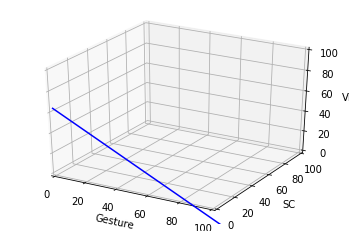

In [40]:
def f(x, y, ans):
    return ans - x - y

x = np.arange(0,100)
y = np.arange(0,100)

z = f(x, y, 64.21)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(0, 100)
ax.set_ylim3d(0,100)
ax.set_zlim3d(0,100)
ax.plot(x, y, z, '-b')
ax.set_xlabel("Gesture")
ax.set_ylabel("SC")
ax.set_zlabel("VR")

In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
EHolo = []
EVr = []
EVi = []
for M in range(0,100):
    for G in range(0,100):
        for S in range(0,100):
            for Hp in range(0,100):
                if(M+G+S+Hp == 100): # equation 4
                    EHolo.append(M+G+S - 87.66) #Equation 1
                    EVr.append(G+S+Hp - 76.55) #Equation 2
                    EVi.append(M+G-45.83)#Equation 3
                    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot(EHolo, EVr, EVi, '-b')
ax.plot(EHolo, EVr, EVi)
ax.set_xlabel("EHolo")
ax.set_ylabel("EVr")
ax.set_zlabel("EVi")

plt.show()

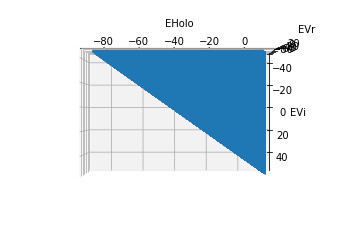

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot(EHolo, EVr, EVi, '-b')
ax.plot(EHolo, EVr, EVi)
ax.set_xlabel("EHolo")
ax.set_ylabel("EVr")
ax.set_zlabel("EVi")

ax.view_init(180,270)
plt.show()

In [1]:
100-76.55

23.450000000000003

In [2]:
100-87.66

12.340000000000003

LinregressResult(slope=1.0, intercept=-12.34000000000001, rvalue=1.0, pvalue=0.0, stderr=0.0)


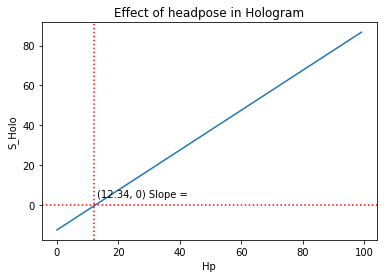

In [15]:
# plotting relationship of headpost against Sholo
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#generate data for Hp
Hp = list(range(0,100))
#generate Sholo data
Sholo = [h-12.34 for h in Hp]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Hp, Sholo)
plt.axvline(x=12,color="red",linestyle=":")
plt.axhline(y=0.333333,color="red",linestyle=":")
ax.annotate('(%s, %s)'% (12.34,0, ), xy=(13,4),textcoords='data')
ax.set_xlabel("Hp")
ax.set_ylabel("S_Holo")
ax.set_title("Effect of headpose in Hologram")
plt.show()

for each hologram incrementation, more hp is needed --> true  
can we conclude

TODO: compare  
M to G  
S_Holo and S_VR  
more graph with G to explain anomoly in affordance analysis slide #17 link   https://docs.google.com/presentation/d/1AbOcYT0NEaV52M9mU1MInLxVE82tKnDg94ezfbQ9aqQ/edit#slide=id.g4d5976a3f7_1_49



LinregressResult(slope=1.0, intercept=-23.449999999999992, rvalue=1.0, pvalue=0.0, stderr=0.0)


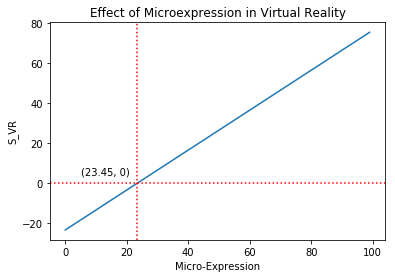

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Equation ==> 23.45=M-Vr
#generate data for M
M = list(range(100))
S_Vr = [m-23.45 for m in M]
linear_regression_result = linregress(M, S_Vr)
print(linear_regression_result)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(M, S_Vr)
plt.axvline(x=23.45,color="red",linestyle=":")
plt.axhline(y=0.0,color="red",linestyle=":")
ax.annotate('(%s, %s)'% (23.45,0), xy=(5,4),textcoords='data')
ax.set_xlabel("Micro-Expression")
ax.set_ylabel("S_VR")
ax.set_title("Effect of Microexpression in Virtual Reality")

fig.show()

Text(0.5, 0, 'Virtural Reality')

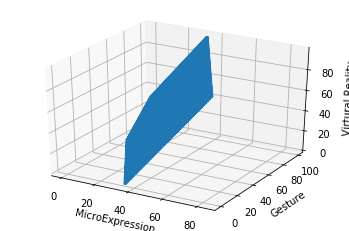

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# Equation => 69.28 = 2*M + G - S_VR + Svi
# Assuming Svi = 0, then we have 69.28 = 2*M + G - S_VR
M = []
G = []
S_VR = []
for m in range(0,100):
    for g in range(0,100):
        for s_vr in range(100):
            if(2 * m + g - s_vr <= 70 and 2 * m + g - s_vr >= 68):
                M.append(m)
                G.append(g)
                S_VR.append(s_vr)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(M,G,S_VR)
ax.set_xlabel("MicroExpression")
ax.set_ylabel("Gesture")
ax.set_zlabel("Virtural Reality")